In [1]:
import json
import os
import matplotlib.pyplot as plt
from datetime import datetime

# Initialize a dictionary to store the counts for each id
id_counts = {}

# Loop through all the files in the folder
for filename in os.listdir("comments_json_anonym"):
  # Load the json file
  with open(f"comments_json_anonym/{filename}", "r", encoding="utf-8") as f:
    data = json.load(f)

  # Loop through all the comments in the json data
  for comment in data:
    # Get the id of the comment owner
    id = comment["owner"]['id']

    # Increment the count for the id
    if id in id_counts:
      id_counts[id] += 1
    else:
      id_counts[id] = 1

    # Check if the comment has answers
    if "answers" in comment:
      # Loop through all the answers to the comment
      for answer in comment["answers"]:
        # Get the id of the answer owner
        id = answer["owner"]['id']

        # Increment the count for the id
        if id in id_counts:
          id_counts[id] += 1
        else:
          id_counts[id] = 1

# Sort the id counts in descending order
sorted_id_counts = sorted(id_counts.items(), key=lambda x: x[1], reverse=True)

# Print the id counts
for id, count in sorted_id_counts:
  print(f"{id}: {count}")

9rICyTfoSV8xPafAZ0Xo0w==: 5011
WCvKFQOJZ9Nps46QU5naiw==: 1609
BgHwq7d7GwT4br6aRwD6iA==: 960
tHhsBln1Eg07izmyBHwkfg==: 794
TTzQ49lA7hkVMeNRIU-TnQ==: 319
_-mf1Sd6sDCg_OX_PGE1gA==: 318
0JGy1vW9l58a9uf5oEdpLw==: 287
10NzvMLnjbhcGmhbVLLhXA==: 260
fSgdKhU7AfEcscu92LytWA==: 254
W_cWctkaUGyE670CzFanJQ==: 239
TDyJzXAewGUfmkXqRqH3Cg==: 202
3W3u797RFAMi2jy9PWfsyw==: 195
MJUHcq3d7NeGt7bOyDI9WA==: 161
8UYJ_McUmzE8ZAyYO5_ipg==: 146
BE-_zXWgX8lI-FgM6TkvJQ==: 141
A6SPnLUgQz4dz87_9YRyig==: 136
Zv5pEzZYmGJD75nXotFwdg==: 136
uQbb5-tHb2sNc7oUm8IJPA==: 133
ApzsosSyYc-0KYS8X6RHhA==: 129
V6FDAaQ-Fuf3hFYiSned6Q==: 123
s-wogNZkRfvdMJHcFFB16A==: 123
7hUL0AlifGmWUSux-Sj0bQ==: 118
2tai7EZtAqQYGyREZyMOOQ==: 113
wb74lYPntbzqt1csof7NQQ==: 111
W2WjfnB-fuvAmVldKFobHA==: 97
yyynItL9vewWH_OaTw1ByA==: 95
ns0fA-6iWpjtfwF2ad10SQ==: 94
4Ko8vbOLC9g6FCrEKGtRbw==: 92
8VkPq5VosORoJPR59TLHuw==: 89
nxp0u4PmInS9xOgZFcWrrA==: 87
J7058MTSwnseCSI35b2ctA==: 86
UJ5B4SfbmZvzGQYgfeFiOQ==: 80
pfcMJLW9XXbV2a-CmdvqsA==: 79
h3L2p9ephK-4RdF6z

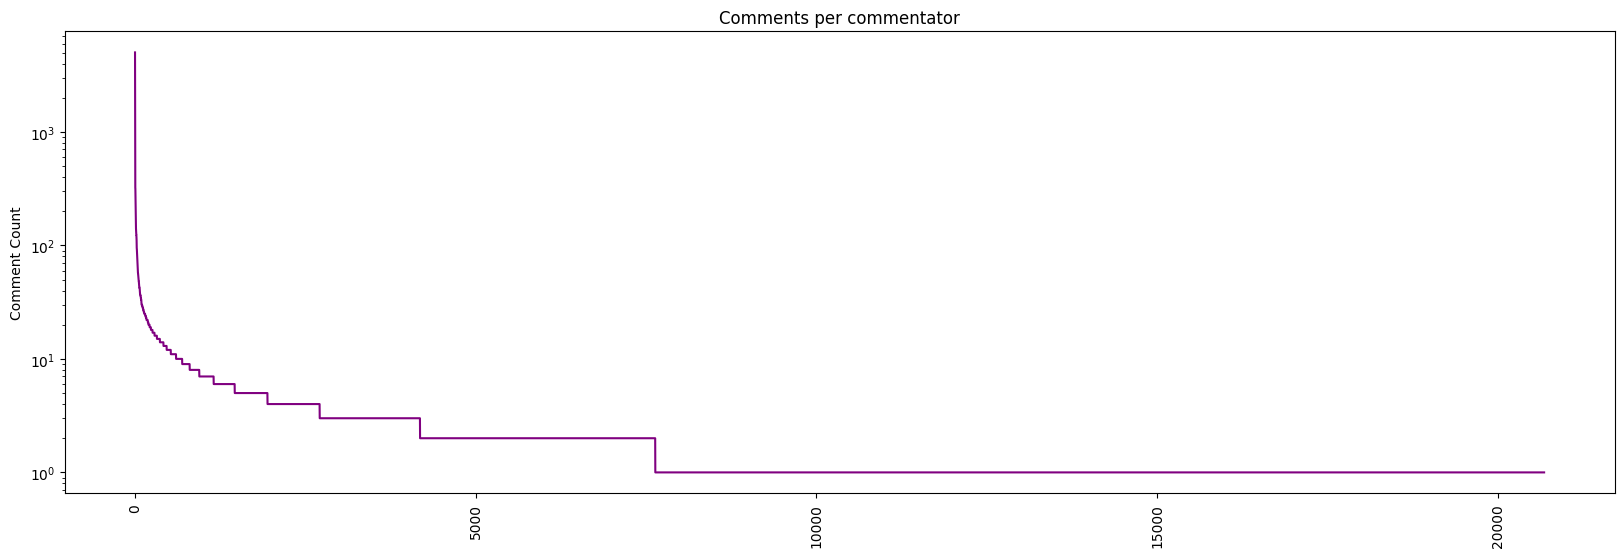

In [5]:
ids, counts = zip(*sorted_id_counts)

plt.figure(dpi=100,figsize=(20, 6))
plt.plot(counts,color="purple")
plt.xticks(rotation=90)
plt.yscale('log')
plt.ylabel("Comment Count")
plt.title("Comments per commentator")
plt.show()

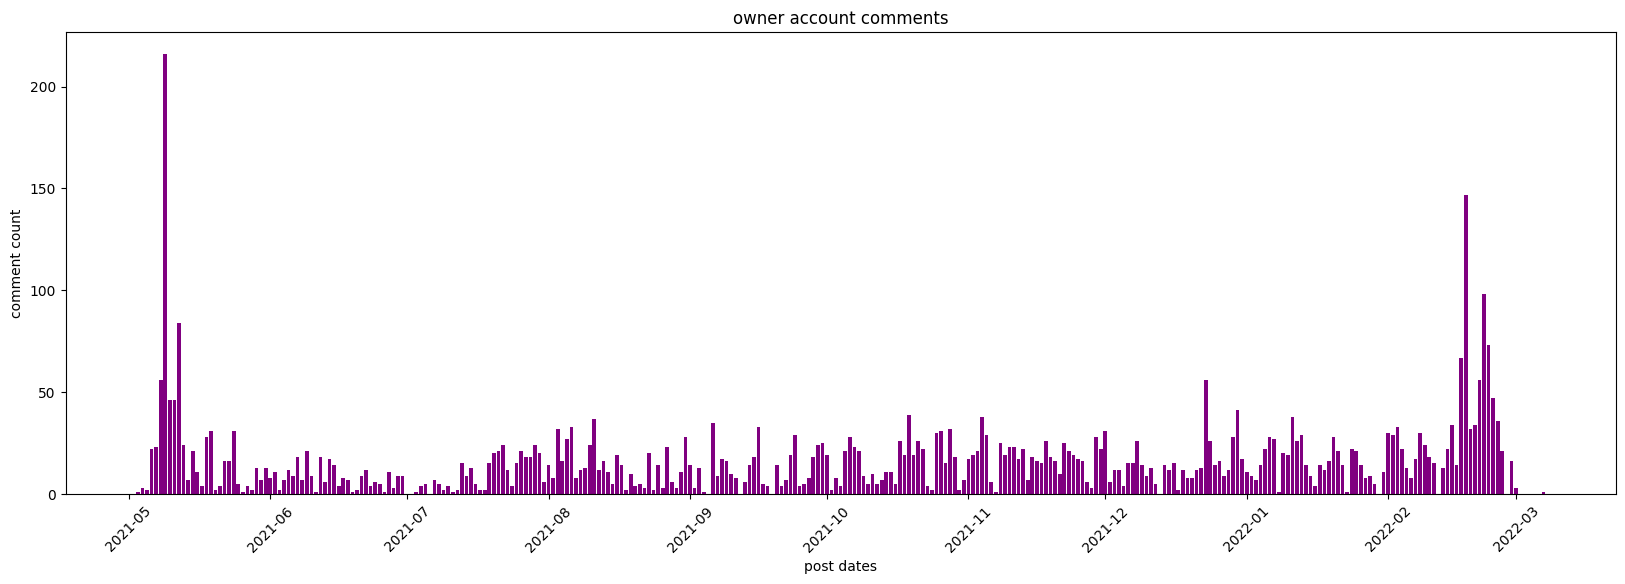

In [10]:
import datetime
# The hash value to search for
hash_value = ids[0]

# A counter for the number of comments per day
counts = {}

# A helper function to process a comment and update the counters
def process_comment(item):
    if 'owner' in item and item['owner']['id'] == hash_value:
        # Get the "created_at" field and parse it as a date
        created_at = item['created_at']
        date = datetime.datetime.fromtimestamp(created_at).date()

        # Increment the counter for the date
        if date in counts:
            counts[date] += 1
        else:
            counts[date] = 1

# Iterate through the JSON files in the "comments_json" folder
for filename in os.listdir('comments_json_anonym'):
    # Read in the JSON file and store the data in a dictionary or list
    with open(os.path.join('comments_json_anonym', filename), 'r',encoding='utf-8') as f:
        data = json.load(f)
    
    # Iterate through the data, looking for comments with the specified hash value in the "owner" field
    for item in data:
        # Process the comment
        process_comment(item)

        # Process any answers as well
        if 'answers' in item:
            for answer in item['answers']:
                process_comment(answer)

# Create a list of dates and a list of counts
dates = []
counts_values = []
for date, count in counts.items():
    dates.append(date)
    counts_values.append(count)

# Create a line plot of the counts over time
plt.figure(figsize=(20,6))
plt.title("owner account comments")
plt.ylabel("comment count")
plt.xlabel("post dates")
plt.bar(dates, counts_values,color="purple")
plt.xticks(rotation=45)
plt.show()

In [11]:
import json
import os
import matplotlib.pyplot as plt
from datetime import datetime

def find_first_answer_date(id, target_id, file):
  """
  Returns the first date when the id has an answer from the target id in the given file.
  """
  # Load the json file
  with open(file, "r") as f:
    data = json.load(f)

  # Loop through all the comments in the json data
  for comment in data:
    # Check if the id of the comment owner matches the given id
    if comment["owner"] == id:
      # Check if the comment has answers
      if "answers" in comment:
        # Loop through all the answers to the comment
        for answer in comment["answers"]:
          # Check if the id of the answer owner matches the target id
          if answer["owner"] == target_id:
            # Get the date when the answer was posted
            answer_date = datetime.fromtimestamp(answer["created_at"])
            # Return the date
            return answer_date

  # If no answer was found, return None
  return None

# Set the id and target id for which you want to find the first answer date
id = ids[1]
target_id = "971cb9c9eada8fe503ecf5b86fe276e492432f4e5a48686164094d5adbd9b700"

# Initialize a variable to store the first answer date
first_answer_date = None

# Loop through all the files in the folder
for filename in os.listdir("comments_json"):
  # Check if the file is a json file
  if filename.endswith(".json"):
    # Get the full path of the file
    file = f"comments_json/{filename}"
    # Call the find_first_answer_date() function to find the first answer date in the file
    answer_date = find_first_answer_date(id, target_id, file)
    # Check if an answer date was found
    if answer_date is not None:
      # If this is the first answer date found, store it in the first_answer_date variable
      if first_answer_date is None:
        first_answer_date = answer_date
      # If this is not the first answer date found, compare it to the first_answer_date variable and update it if it is earlier
      else:
        if answer_date < first_answer_date:
          first_answer_date = answer_date

# Print the first answer date
print(first_answer_date)


UnicodeDecodeError: 'charmap' codec can't decode byte 0x9d in position 111: character maps to <undefined>

In [ ]:
def count_comments_for_id(id, date, file):
  """
  Returns the count of comments for the given id in the given file after the given date.
  """
  # Initialize a counter for the comments
  count = 0

  # Load the json file
  with open(file, "r") as f:
    data = json.load(f)

  # Loop through all the comments in the json data
  for comment in data:
    # Check if the id of the comment owner matches the given id
    if comment["owner"] == id:
      # Get the date when the comment was posted
      comment_date = datetime.fromtimestamp(comment["created_at"])
      # Check if the comment was posted after the given date
      if comment_date > date:
        # Increment the count
        count += 1

    # Check if the comment has answers
    if "answers" in comment:
      # Loop through all the answers to the comment
      for answer in comment["answers"]:
        # Check if the id of the answer owner matches the given id
        if answer["owner"] == id:
          # Get the date when the answer was posted
          answer_date = datetime.fromtimestamp(answer["created_at"])
          # Check if the answer was posted after the given date
          if answer_date > date:
            # Increment the count
            count += 1

  return count

# Set the id and date for which you want to count the comments

# Initialize a list to store the counts for each file
counts = []
dates = []
# Loop through all the files in the folder
for filename in os.listdir("comments_json"):
  # Check if the file is a json file
  if filename.endswith(".json"):
    # Get the full path of the file
    file = f"comments_json/{filename}"
    # Call the count_comments_for_id() function to count the comments for the given id in the file after the given date
    count = count_comments_for_id(id, first_answer_date, file)
    # Append the count to the counts list
    counts.append(count)
    post_date = datetime.strptime(filename.split("_")[0], "%Y-%m-%d")
    dates.append(post_date)

# Create a bar chart
plt.vlines(first_answer_date,colors="r",ymin=0,ymax=26,linestyles="dashed",linewidth=0.5,label="first owner interaction")
plt.bar(dates, counts)
plt.title("Second most commentator comment count")
plt.legend()
plt.xlabel("dates")
plt.ylabel("Count of Comments")
plt.xticks(rotation=75)
# Show the plot
plt.show()